# Marketing Analysis: Exploratory Data Analysis

**Summary**
- Imports
- First Impression
- Preprocessing
    - Rename column names
    - Reorder columns
    - Correct Datatypes
    - Remove NaN values
- Exploratory Data Analyisis

## Imports & Settings

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [3]:
from matplotlib.colors import ListedColormap

# Setting up color palette for easier use later
sns.set_palette("Set2")
cmap = ListedColormap(sns.color_palette("Set2")) # set cmap as 'Set2'

# Create individual colors
pal = sns.color_palette("Set2") # Use of Seaborn 'Set2' palette
color_list = pal.as_hex() # Save list as hexcodes

# Assign color to variable
set2_green = color_list[0]
set2_orange = color_list[1]
set2_blue = color_list[2]
set2_rose = color_list[3]
set2_green2 = color_list[4]
set2_yellow = color_list[5]
set2_beige = color_list[6]
set2_grey = color_list[7]

color_list

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

## First impression

In [4]:
data = pd.read_csv("data/marketing_data.csv")

In [5]:
data.head(5)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,response,complain,country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2240 non-null   int64 
 1   year_birth             2240 non-null   int64 
 2   education              2240 non-null   object
 3   marital_status         2240 non-null   object
 4    income                2216 non-null   object
 5   kidhome                2240 non-null   int64 
 6   teenhome               2240 non-null   int64 
 7   dt_customer            2240 non-null   object
 8   recency                2240 non-null   int64 
 9   mnt_wines              2240 non-null   int64 
 10  mnt_fruits             2240 non-null   int64 
 11  mnt_meat_products      2240 non-null   int64 
 12  mnt_fish_products      2240 non-null   int64 
 13  mnt_sweet_products     2240 non-null   int64 
 14  mnt_gold_prods         2240 non-null   int64 
 15  num_deals_purchases  

## Preprocessing

### Removing Whitespace

The `Income` column, has unnecessary whitespace before the name. The first step entails removing all whitespace in the column names.

In [7]:
data.columns = data.columns.str.replace(' ', '')

In [8]:
data.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,response,complain,country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA


### Correct datatypes (dtypes) of columns

In [9]:
data.dtypes # dtype overview

id                        int64
year_birth                int64
education                object
marital_status           object
income                   object
kidhome                   int64
teenhome                  int64
dt_customer              object
recency                   int64
mnt_wines                 int64
mnt_fruits                int64
mnt_meat_products         int64
mnt_fish_products         int64
mnt_sweet_products        int64
mnt_gold_prods            int64
num_deals_purchases       int64
num_web_purchases         int64
num_catalog_purchases     int64
num_store_purchases       int64
num_web_visits_month      int64
accepted_cmp_3            int64
accepted_cmp_4            int64
accepted_cmp_5            int64
accepted_cmp_1            int64
accepted_cmp_2            int64
response                  int64
complain                  int64
country                  object
dtype: object

In [10]:
data.dt_customer = pd.to_datetime(data.dt_customer) # Change to datetime in `dt_customer`
data.income = pd.to_numeric(data.income.replace('[^0-9\.-]', '', regex=True)) # Change `income` from currency based string dtype to float


### Remove NaN values

Let's check the dataset for any missing (NaN) values. As you can see below, theere are only some missing values in the `income` column.

<AxesSubplot:>

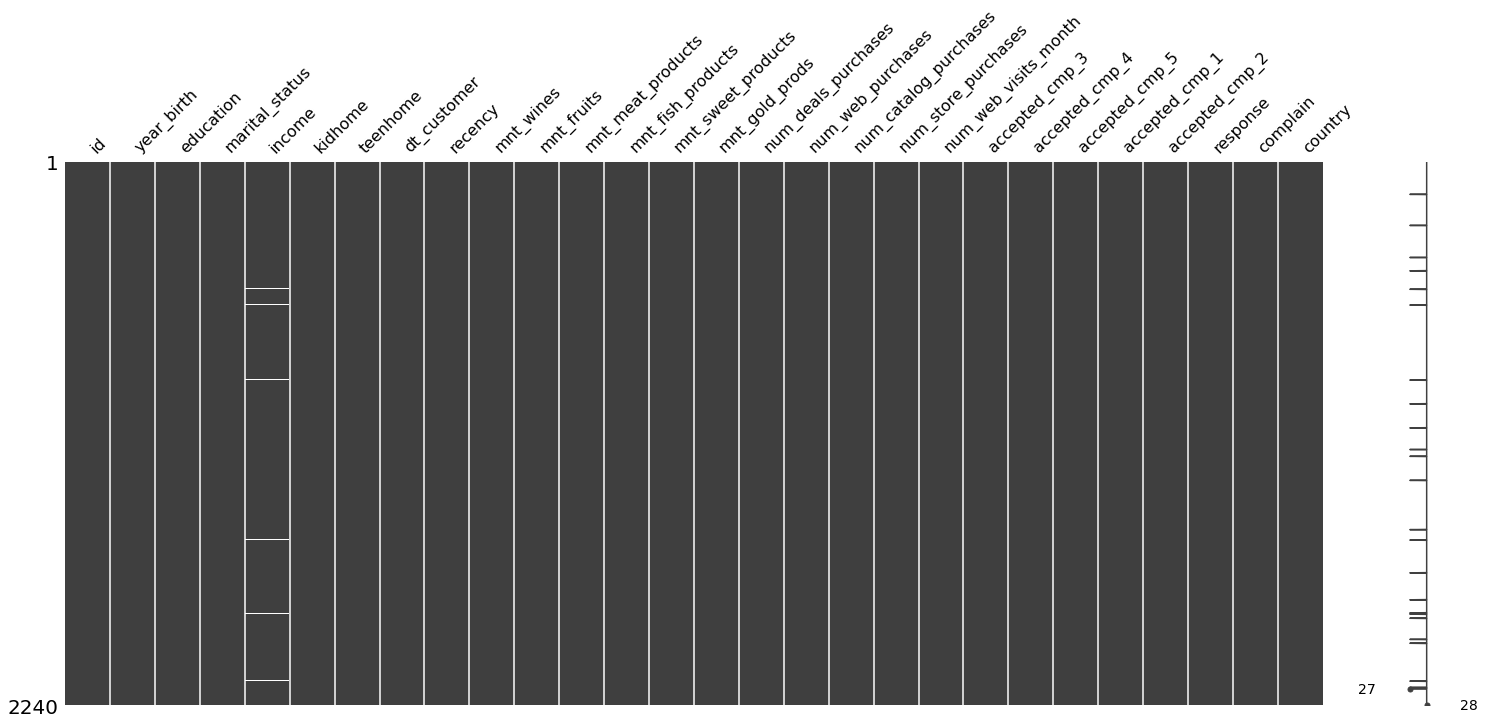

In [11]:
msno.matrix(data)

In [12]:
# Making sure that the 'income' column has no outliers and mean is an effective way to replace NaN values.
display(data.income.describe())

# Fill NaN with mean
data.income.fillna(data.income.mean(),inplace=True)

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

### Remove outliers

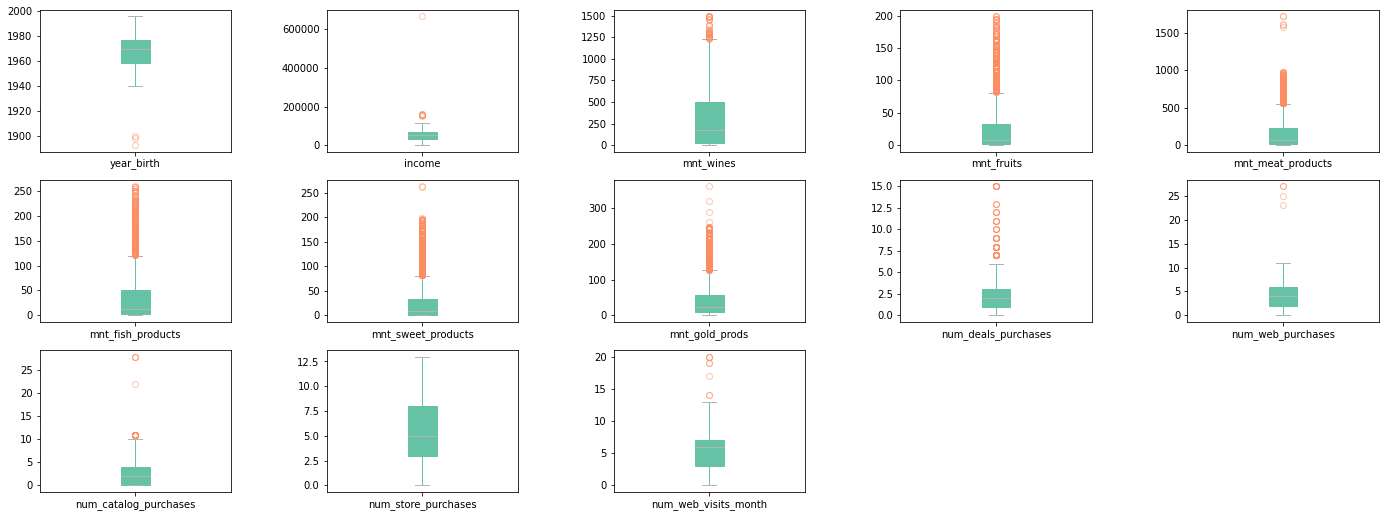

In [13]:
mask_subset = ['year_birth', 'income', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month']

data[mask_subset].plot(cmap=cmap, flierprops=dict(c=set2_orange, markeredgecolor=set2_orange, alpha=.5), capprops=dict(c=set2_grey),
       subplots=True, layout=(4,5), kind='box', figsize=(24,12), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

It is visible that there is a couple of outliers in these fields:
- `income` has one large outlier
- `year_birth` has multiple people born before 1900 which seems unlikely

In [14]:
mean_income = data.income.mean() # Calculate mean income
median_year_birth = data.year_birth.median() # Calculate the median age

# Apply lambda function to impute outliers with mean and median
data.income = data.income.apply(lambda x: mean_income if x>300000 else x)
data.year_birth = data.year_birth.apply(lambda x: median_year_birth if x>=2004 or x<=1930 else x)

### Add new columns

There are columns in this dataset that either need updating or can be added for more information.

To be updated:
- `country_code`
- `country`

To be created new:
- `age`
- `minors`
- `mnt_total`
- `purchases`

In [15]:
# Update country columns for better visualization
data["country_code"] = data.country
data.country = data.country.replace({
    'SP':'Spain', 'SA':'South Africa', 'CA':'Canada', 'AUS':'Australia',
    'IND':'India', 'GER':'Germany', 'US':'USA','ME':'Montenegro'
    })

In [16]:
# Add age column. Reversed-engineered from `year_birth` column
data["age"] = data.year_birth.apply(lambda x: datetime.now().year - x)

# Add `minors` column which is the total of kids and teens in a home
data['minors_home'] = data.kidhome + data.teenhome

# Add `mnt_total` column which is the total consumption of all goods
mnt_columns = [column for column in data.columns if 'mnt' in column]
data['mnt_total'] =  data[mnt_columns].sum(axis=1)

# Add `purchases` column which is the total purchases
purchases_columns = [column for column in data.columns if 'purchases' in column]
data['purchases_total'] = data[purchases_columns].sum(axis=1)

# Total Campaigns Accepted
campaigns_column = [column for column in data.columns if 'cmp' in column] + ['response']
data['accepted_cmp_total'] = data[campaigns_column].sum(axis=1)


## Education change values

The `education` column has very unique and confusing values. It is not clear what the values mean. Let's analyze it.

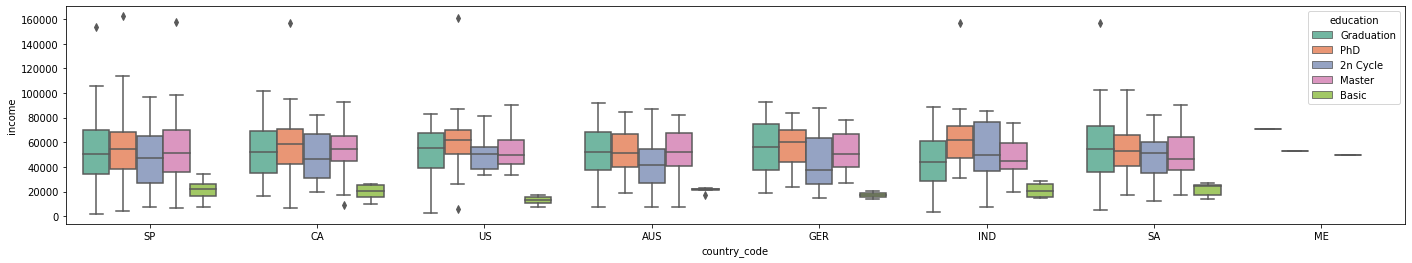

In [39]:
plt.figure(figsize=(24,4))
sns.boxplot(data=data,x="country_code", y="income", hue="education")
plt.show()

As suspected, there is an anomaly looking at basic level education and income. "Basic" seems to be a mere High School degree while 2n Cycle and Master is the same degree as Master. (click [here](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/) for reference)

That means that:
- '2n Cycle' and 'Master' can be merged,
- 'Graduation' equals Bachelors degree,
- 'Basic' is a high school diploma.

this column is so uncertain and the spred in `income` is too inconsistent to create a clear rule to rename the features. Therefore, this feature should be interpreted with care.

In [41]:
data.education.replace("2n Cycle", "Master", inplace=True)

### Reorder columns

In [18]:
# The order of the columns is non-sequential. Campaign 3 comes before Campaign 1. Let's reorder the columns.
order = [
    'id',
    'year_birth',
    'age',
    'education',
    'marital_status',
    'income',
    'kidhome',
    'teenhome',
    'minors_home',
    'dt_customer',
    'recency',
    'mnt_wines',
    'mnt_fruits',
    'mnt_meat_products',
    'mnt_fish_products',
    'mnt_sweet_products',
    'mnt_gold_prods',
    'mnt_total',
    'num_deals_purchases',
    'num_web_purchases',
    'num_catalog_purchases',
    'num_store_purchases',
    'purchases_total',
    'num_web_visits_month',
    'accepted_cmp_1',
    'accepted_cmp_2',
    'accepted_cmp_3',
    'accepted_cmp_4',
    'accepted_cmp_5',
    'accepted_cmp_total',
    'response',
    'complain',
    'country',
    'country_code',
]
data = data[order]

In [19]:
data.head()

,id,year_birth,age,education,marital_status,income,kidhome,teenhome,minors_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,mnt_total,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,purchases_total,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_total,response,complain,country,country_code
0,1826,1970.0,52.0,Graduation,Divorced,84835.0,0,0,0,2014-06-16,0,189,104,379,111,189,218,1190,1,4,4,6,15,1,0,0,0,0,0,1,1,0,Spain,SP
1,1,1961.0,61.0,Graduation,Single,57091.0,0,0,0,2014-06-15,0,464,5,64,7,0,37,577,1,7,3,7,18,5,0,1,0,0,0,2,1,0,Canada,CA
2,10476,1958.0,64.0,Graduation,Married,67267.0,0,1,1,2014-05-13,0,134,11,59,15,2,30,251,1,3,2,5,11,2,0,0,0,0,0,0,0,0,USA,US
3,1386,1967.0,55.0,Graduation,Together,32474.0,1,1,2,2014-05-11,0,10,0,1,0,0,0,11,1,1,0,2,4,7,0,0,0,0,0,0,0,0,Australia,AUS
4,5371,1989.0,33.0,Graduation,Single,21474.0,1,0,1,2014-04-08,0,6,16,24,11,0,34,91,2,3,1,2,8,7,0,0,1,0,0,2,1,0,Spain,SP


The dataset is now wrangeled and preprocessed. For convenience the clean dataset shall be renamed `df`.

In [20]:
df = data

## Exploratory Data Analysis

### Overview

In [21]:
df.head()

,id,year_birth,age,education,marital_status,income,kidhome,teenhome,minors_home,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,mnt_total,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,purchases_total,num_web_visits_month,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_total,response,complain,country,country_code
0,1826,1970.0,52.0,Graduation,Divorced,84835.0,0,0,0,2014-06-16,0,189,104,379,111,189,218,1190,1,4,4,6,15,1,0,0,0,0,0,1,1,0,Spain,SP
1,1,1961.0,61.0,Graduation,Single,57091.0,0,0,0,2014-06-15,0,464,5,64,7,0,37,577,1,7,3,7,18,5,0,1,0,0,0,2,1,0,Canada,CA
2,10476,1958.0,64.0,Graduation,Married,67267.0,0,1,1,2014-05-13,0,134,11,59,15,2,30,251,1,3,2,5,11,2,0,0,0,0,0,0,0,0,USA,US
3,1386,1967.0,55.0,Graduation,Together,32474.0,1,1,2,2014-05-11,0,10,0,1,0,0,0,11,1,1,0,2,4,7,0,0,0,0,0,0,0,0,Australia,AUS
4,5371,1989.0,33.0,Graduation,Single,21474.0,1,0,1,2014-04-08,0,6,16,24,11,0,34,91,2,3,1,2,8,7,0,0,1,0,0,2,1,0,Spain,SP


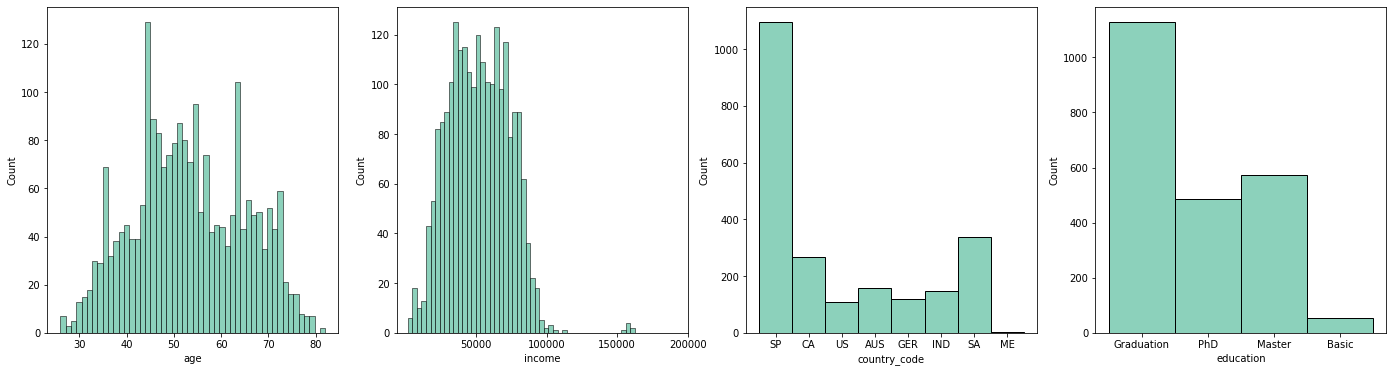

In [42]:
fig, ax = plt.subplots(1,4,figsize=(24,6))

sns.histplot(df, x="age", ax=ax[0], bins=50)
sns.histplot(df, x="income", ax=ax[1], bins=50)
sns.histplot(df, x="country_code", ax=ax[2])
sns.histplot(df, x="education", ax=ax[3])

ax[1].set_xticks([50000,100000,150000,200000])
plt.show()

In [23]:
df.education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64

### Correlation Matrix

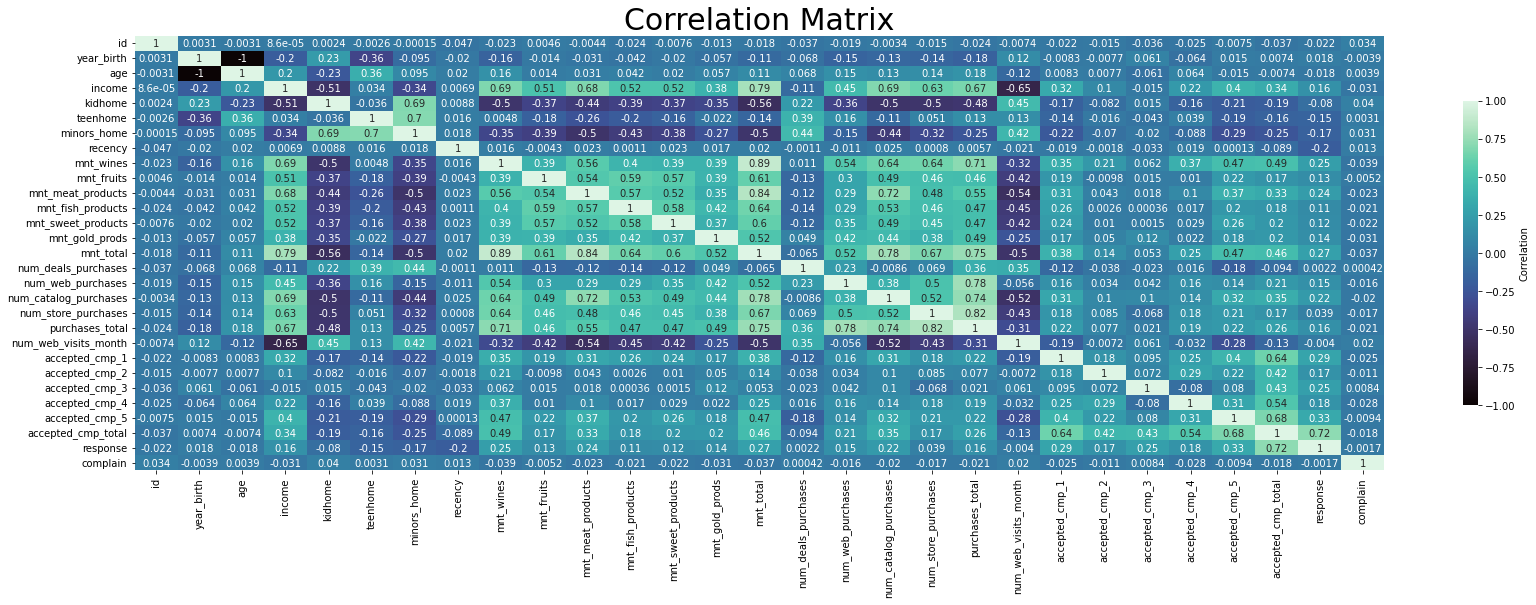

In [24]:
plt.figure(figsize=(28,8))
ax = sns.heatmap(df.corr(),annot=True,cmap='mako',cbar_kws={"shrink": .7, "label": "Correlation"}) # create heatmap
ax.set_title("Correlation Matrix", fontsize=30) # Set Title and increase font size
plt.show()

**What are takeaways from the correlation matrix above?**

- Overall consumption of products are positively correlated with `income`
- Catalog, Store, and Total Purchases are positevly correlated with `income`
- Number of dependants, kids, and teens are negatively correlated with `mnt_total` & `purchases_total`
    - kids show significantly more correlation than teens
- `num_deals_purchased` is positively correlated with the amount of minors in a home
- `num_web_visits_month` is not correlated with `num_web_purchases` which is suprising
    - instead `num_web_visits_month` is correlated with `num_deals_purchased`

### Income correlation to `income`

<AxesSubplot:xlabel='income', ylabel='mnt_gold_prods'>

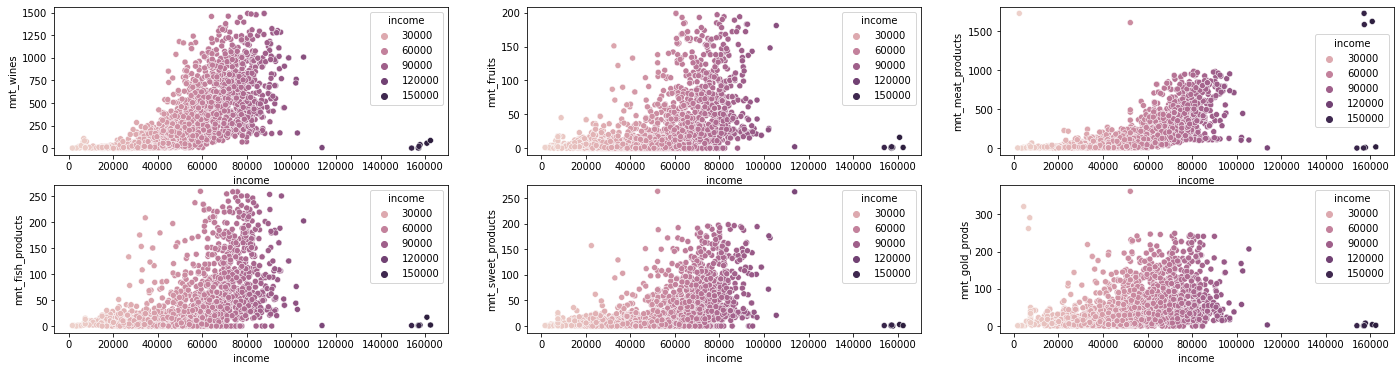

In [25]:
fig, ax = plt.subplots(2,3,figsize=(24,6))

sns.scatterplot(data=df, x="income", y="mnt_wines", hue="income", ax=ax[0,0])
sns.scatterplot(data=df, x="income", y="mnt_fruits", hue="income", ax=ax[0,1])
sns.scatterplot(data=df, x="income", y="mnt_meat_products", hue="income", ax=ax[0,2])
sns.scatterplot(data=df, x="income", y="mnt_fish_products", hue="income", ax=ax[1,0])
sns.scatterplot(data=df, x="income", y="mnt_sweet_products", hue="income", ax=ax[1,1])
sns.scatterplot(data=df, x="income", y="mnt_gold_prods", hue="income", ax=ax[1,2])

In [26]:
fig = px.scatter(df, x="income", y="mnt_total",color="income", color_continuous_scale='Agsunset', 
    trendline="lowess",trendline_scope="overall", trendline_color_override="black",
    title="Amount of products consumed per annual income")

fig.update_xaxes(showgrid=False, zeroline=True)
fig.update_yaxes(showgrid=False, zeroline=True)

### Geospatial analysis